In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
from pandas_datareader.data import DataReader
from datetime import datetime
import pmdarima as pm

In [7]:
usrec = DataReader("USREC", "fred", start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

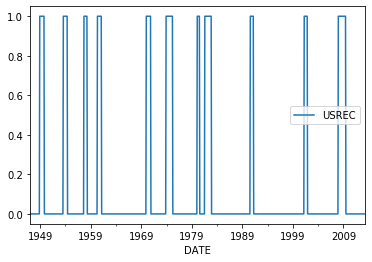

In [9]:
usrec.plot()

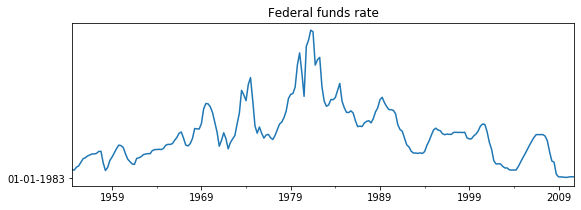

In [41]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds

dta_fedfunds = pd.Series(
    fedfunds, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS")
)

# Plot the data
dta_fedfunds.plot(title="Federal funds rate", figsize=(9, 3))
plt.fill_between('04-02-1968','01-01-1983')
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(dta_fedfunds, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()

In [39]:
plt.fill_between?

Signature:
plt.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
creates one or multiple polygons describing the filled area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly. Use *step* if
the filling should be a step function, i.e. constant in between *x*.


Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, optional, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional, default: None
    Define *where* to exclude some horizontal regions from being
    filled. The fi

In [2]:
res.summary()

NameError: name 'res' is not defined

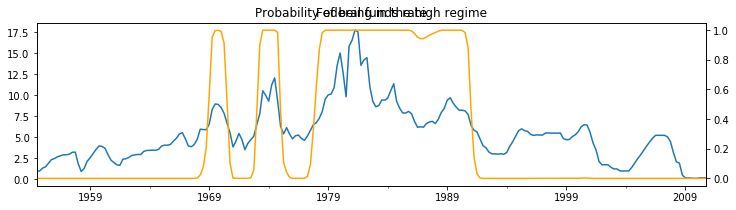

In [3]:
ax=dta_fedfunds.plot(title="Federal funds rate", figsize=(12, 3))
ax2=ax.twinx()
res_fedfunds.smoothed_marginal_probabilities[1].plot(ax=ax2,
    title="Probability of being in the high regime", figsize=(12, 3), color='orange'
)


In [4]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[1:], k_regimes=2, exog=dta_fedfunds.iloc[:-1]
)
res_fedfunds2 = mod_fedfunds2.fit()


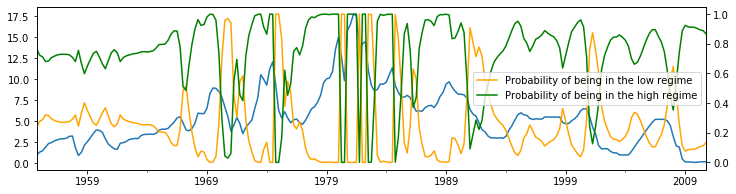

In [5]:
ax=dta_fedfunds.plot( figsize=(12, 3))
ax2=ax.twinx()
res_fedfunds2.smoothed_marginal_probabilities[0].plot(ax=ax2,
    label="Probability of being in the low regime", figsize=(12, 3), color='orange'
)
res_fedfunds2.smoothed_marginal_probabilities[1].plot(ax=ax2,
    label="Probability of being in the high regime", figsize=(12, 3), color='green'
)
ax2.legend()

In [5]:
# Get the additional data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import ogap, inf

dta_ogap = pd.Series(ogap, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS"))
dta_inf = pd.Series(inf, index=pd.date_range("1954-07-01", "2010-10-01", freq="QS"))
exog = pd.concat((dta_fedfunds.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]

# mod_fedfunds3 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=2, exog=exog)
# res_fedfunds3 = mod_fedfunds3.fit()

# # Fit the 3-regime model
# np.random.seed(12345)
# mod_fedfunds4 = sm.tsa.MarkovRegression(dta_fedfunds.iloc[4:], k_regimes=3, exog=exog)
# res_fedfunds4 = mod_fedfunds4.fit(search_reps=20)



In [10]:
dta_inf

1954-07-01         NaN
1954-10-01         NaN
1955-01-01         NaN
1955-04-01         NaN
1955-07-01   -0.234724
                ...   
2009-10-01    1.487498
2010-01-01    2.336871
2010-04-01    1.785890
2010-07-01    1.228732
2010-10-01    1.215500
Freq: QS-JAN, Length: 226, dtype: float64

In [8]:
exog

,0,1,2
1955-07-01,1.50,4.157602,-0.234724
1955-10-01,1.94,4.287756,0.373734
1956-01-01,2.36,3.016838,0.250065
1956-04-01,2.48,2.641856,1.046455
1956-07-01,2.69,1.824735,2.016656
...,...,...,...
2009-10-01,0.16,-6.894039,1.487498
2010-01-01,0.12,-6.830622,2.336871
2010-04-01,0.13,-6.265080,1.785890
2010-07-01,0.19,-5.932871,1.228732


In [12]:
dta_fedfunds.shift()

1954-07-01     NaN
1954-10-01    1.03
1955-01-01    0.99
1955-04-01    1.34
1955-07-01    1.50
              ... 
2009-10-01    0.16
2010-01-01    0.12
2010-04-01    0.13
2010-07-01    0.19
2010-10-01    0.19
Freq: QS-JAN, Length: 226, dtype: float64

In [16]:
dta_fedfunds.iloc[1:]

1954-10-01    0.99
1955-01-01    1.34
1955-04-01    1.50
1955-07-01    1.94
1955-10-01    2.36
              ... 
2009-10-01    0.12
2010-01-01    0.13
2010-04-01    0.19
2010-07-01    0.19
2010-10-01    0.19
Freq: QS-JAN, Length: 225, dtype: float64

In [15]:
dta_fedfunds.iloc[:-1]

1954-07-01    1.03
1954-10-01    0.99
1955-01-01    1.34
1955-04-01    1.50
1955-07-01    1.94
              ... 
2009-07-01    0.16
2009-10-01    0.12
2010-01-01    0.13
2010-04-01    0.19
2010-07-01    0.19
Freq: QS-JAN, Length: 225, dtype: float64

In [2]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

In [11]:
df=pd.read_csv('/project/biocomplexity/COVID-19_commons/data/VDH_wastewater/processed_data/state_aggregation_CLI_case_hosp_wastewater_2023-04-23.csv',index_col=['time_value'])
df.index=pd.to_datetime(df.index)

In [14]:
datadf=df['BOW_cases'].dropna()

In [15]:
data=datadf.values
ind=datadf.index

In [17]:
arima = pm.auto_arima(data, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3189.860, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3622.173, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3304.079, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3515.927, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3705.434, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3188.546, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=3186.725, Time=0.04 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3188.629, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=3191.550, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3216.681, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=3187.515, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=3187.185, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3258.911, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[12] intercept   : AIC=3190.027, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0

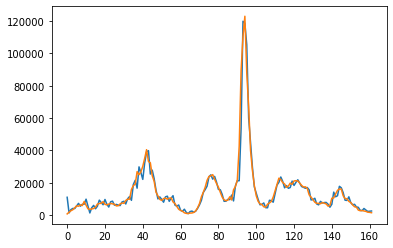

In [18]:
plt.plot(arima.predict_in_sample())
plt.plot(data)


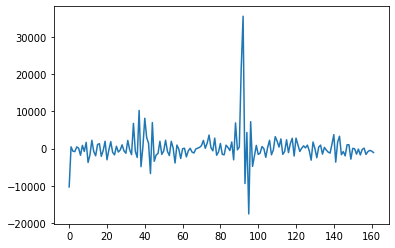

In [19]:
plt.plot(data-arima.predict_in_sample())

In [21]:
np.mean((data-arima.predict_in_sample())**2)

19083003.03165933